Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 646, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 57,282
Trainable params: 57,282
Non-trainable params: 0
_________________________________________________________________
Train on 115 samples, validate on 29 samples
Epoch 1/15
115/115 [==============================] - 22s 193ms/sample - 

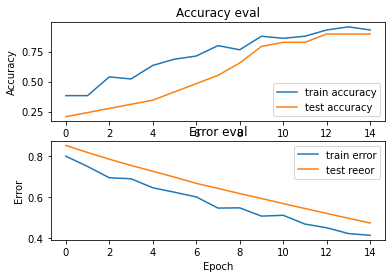

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "data_for_record.json"
TEST_DATASET_PATH = "test_data_for_record.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
        
    # convert the lists into numpy arrays
    x = np.array(data["mfcc"])    # x is input
    y = np.array(data["labels"])  # y is target
    
    return x, y


def prepare_datasets(test_size, validation_size):
    # load data
    x, y = load_data(DATASET_PATH)
    
    # create train/test split
    x_train, x_test, y_train, y_test = train_test_split(x,
                                                        y,
                                                        test_size = test_size)
    
    # create train/ validation split
    x_train, x_validation, y_train, y_validation = train_test_split(x_train,
                                                                    y_train,
                                                                    test_size = validation_size)
     
    return x_train, x_validation, x_test, y_train, y_validation, y_test




def build_model(input_shape):
    
    # create RNN-LSTM model
    model = keras.Sequential()
    
    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape = input_shape, return_sequences = True))
    model.add(keras.layers.LSTM(64))
    
    
    # dense Layer
    
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
              
              
    
    
    
    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))
    
    return model


def predict(model, X, Y):
    X = X[np.newaxis, ...]
    # prediction = [[0.1, 0.2,.....]]( normalized value form softmax)
    prediction = model.predict(X) # X -> (1, 130, 13, 1)
    
    # extract index with max value
    predicted_index = np.argmax(prediction, axis=1) # [4]
    print("Expected index : {}, Predicted index : {}".format(Y, predicted_index))
    
    
def plot_history(history):
    
    fig, axs = plt.subplots(2)
    
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test reeor")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
    

if __name__ == "__main__":
    
    # create train, validation and test sets
    x_train, x_validation, x_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2) # test set and then validation
    
    # build the CNN net
    input_shape = (x_train.shape[1], x_train.shape[2]) # 26, 13 
    model = build_model(input_shape)
    
    
    # compile the network
    
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer = optimizer,
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])
    
    model.summary()
    
    # train the CNN
    history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation),
             batch_size=32, epochs=15)
    
    # plot accuracy / error for training and validation
    # plot_history(history)
    
    # evaluate the CNN on the test set
    test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    print("Accuracy on test set is : {}".format(test_accuracy))
    
    
    for i in range(len(x_test)):
        
        predict(model, x_test[i], y_test[i])
    
    
    plot_history(history)
    
    